# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"# YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]# YOUR CODE HERE /\
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE /\
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE /\
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE /\
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE /\
        city_wind = city_weather["wind"]["speed"]# YOUR CODE HERE /\
        city_country = city_weather["sys"]["country"]# YOUR CODE HERE /\ 
        city_date = city_weather["dt"]# YOUR CODE HERE /\

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | keflavik
Processing Record 2 of Set 1 | kuraymah
Processing Record 3 of Set 1 | constantia
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | puerto real
Processing Record 6 of Set 1 | mount isa
Processing Record 7 of Set 1 | afaahiti
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | zaozersk
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | luderitz
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | ahau
City not found. Skipping...
Processing Record 14 of Set 1 | buka
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | kisangani
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of S

Processing Record 41 of Set 4 | arno
Processing Record 42 of Set 4 | shingu
Processing Record 43 of Set 4 | sao jose da coroa grande
Processing Record 44 of Set 4 | bambanglipuro
Processing Record 45 of Set 4 | kirensk
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | rongelap
Processing Record 48 of Set 4 | trevelin
Processing Record 49 of Set 4 | palikir - national government center
Processing Record 0 of Set 5 | east london
Processing Record 1 of Set 5 | san antonio de pale
Processing Record 2 of Set 5 | puerto madero
Processing Record 3 of Set 5 | tieli
Processing Record 4 of Set 5 | college
Processing Record 5 of Set 5 | chanika
Processing Record 6 of Set 5 | calasparra
Processing Record 7 of Set 5 | happy valley-goose bay
Processing Record 8 of Set 5 | parras de la fuente
Processing Record 9 of Set 5 | talnakh
Processing Record 10 of Set 5 | preobrazheniye
Processing Record 11 of Set 5 | chonchi
Processing Record 12 of Set 5 | pudasjarvi
Processing Recor

Processing Record 35 of Set 8 | jiuquan
Processing Record 36 of Set 8 | ponta delgada
Processing Record 37 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 38 of Set 8 | salalah
Processing Record 39 of Set 8 | chipinge
Processing Record 40 of Set 8 | pacocha
Processing Record 41 of Set 8 | samamea
City not found. Skipping...
Processing Record 42 of Set 8 | nizhneudinsk
Processing Record 43 of Set 8 | port blair
Processing Record 44 of Set 8 | severo-yeniseyskiy
Processing Record 45 of Set 8 | alaghsas
Processing Record 46 of Set 8 | north bend
Processing Record 47 of Set 8 | mejit
Processing Record 48 of Set 8 | uliastay
Processing Record 49 of Set 8 | koksovyy
Processing Record 0 of Set 9 | guangyuan
Processing Record 1 of Set 9 | chapra
Processing Record 2 of Set 9 | dapa
Processing Record 3 of Set 9 | lobujya
Processing Record 4 of Set 9 | tyukhtet
Processing Record 5 of Set 9 | tabou
Processing Record 6 of Set 9 | charters towers
Processing Record 7 of Set 9 | ar

Processing Record 20 of Set 12 | akjoujt
Processing Record 21 of Set 12 | al burayqah
Processing Record 22 of Set 12 | galle
Processing Record 23 of Set 12 | kamwenge
Processing Record 24 of Set 12 | mumford
Processing Record 25 of Set 12 | spearfish
Processing Record 26 of Set 12 | caleta de carquin
Processing Record 27 of Set 12 | auki
Processing Record 28 of Set 12 | sydney
Processing Record 29 of Set 12 | mao
Processing Record 30 of Set 12 | buabidi
City not found. Skipping...
Processing Record 31 of Set 12 | brisas de zicatela
Processing Record 32 of Set 12 | kaoma
Processing Record 33 of Set 12 | berdigestyakh
Processing Record 34 of Set 12 | avsar
City not found. Skipping...
Processing Record 35 of Set 12 | nacala
Processing Record 36 of Set 12 | pariaman
Processing Record 37 of Set 12 | yuzhno-kurilsk
Processing Record 38 of Set 12 | bemidji
Processing Record 39 of Set 12 | aban
Processing Record 40 of Set 12 | douz
Processing Record 41 of Set 12 | callao
Processing Record 42 o

In [6]:
len(city_data)

572

In [7]:
cities

['keflavik',
 'kuraymah',
 'constantia',
 'jamestown',
 'puerto real',
 'mount isa',
 'afaahiti',
 'waitangi',
 'zaozersk',
 'bethel',
 'luderitz',
 'iqaluit',
 'ahau',
 'buka',
 'adamstown',
 'kisangani',
 'aasiaat',
 'hithadhoo',
 'puerto san carlos',
 'grytviken',
 'ushuaia',
 'puerto natales',
 'stanley',
 'worland',
 'fortuna',
 'beacon square',
 'margate',
 'bodo',
 'baiti',
 'bredasdorp',
 'port-aux-francais',
 'taiohae',
 "kapa'a",
 'northam',
 'yellowknife',
 'punta arenas',
 "nuku'alofa",
 'iskateley',
 'greymouth',
 'ilulissat',
 'aykhal',
 'susuman',
 'port elizabeth',
 'santana',
 'axim',
 'ribeira grande',
 'labasa',
 'hadibu',
 'alofi',
 'tazacorte',
 'port lincoln',
 'muynoq',
 'fredericksburg',
 'yanam',
 'manggar',
 'illizi',
 'anadyr',
 'bryne',
 'puerto ayora',
 'port mathurin',
 'krasnokamensk',
 'san angelo',
 'fuling',
 'ciudad melchor muzquiz',
 'lompoc',
 'hermanus',
 'kladanj',
 'albany',
 'sao tome',
 'den burg',
 'oban',
 'papatowai',
 'palmas',
 'cuyo',
 's

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,keflavik,64.0049,-22.5624,3.95,70,0,8.23,IS,1699846984
1,kuraymah,18.5500,31.8500,27.30,27,67,2.30,SD,1699847183
2,constantia,44.1833,28.6500,5.38,51,100,1.68,RO,1699846914
3,jamestown,42.0970,-79.2353,2.80,77,0,0.45,US,1699847007
4,puerto real,36.5282,-6.1901,15.70,88,0,3.60,ES,1699847184


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,keflavik,64.0049,-22.5624,3.95,70,0,8.23,IS,1699846984
1,kuraymah,18.5500,31.8500,27.30,27,67,2.30,SD,1699847183
2,constantia,44.1833,28.6500,5.38,51,100,1.68,RO,1699846914
3,jamestown,42.0970,-79.2353,2.80,77,0,0.45,US,1699847007
4,puerto real,36.5282,-6.1901,15.70,88,0,3.60,ES,1699847184


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

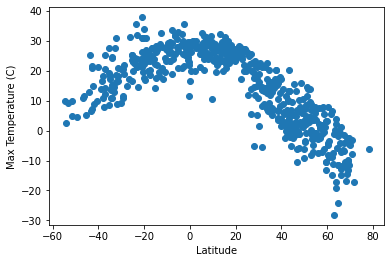

In [12]:
# Build scatter plot for latitude vs. temperature
temp_x_values = city_data_df["Lat"]
temp_y_values = city_data_df["Max Temp"]
plt.scatter(temp_x_values,temp_y_values)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

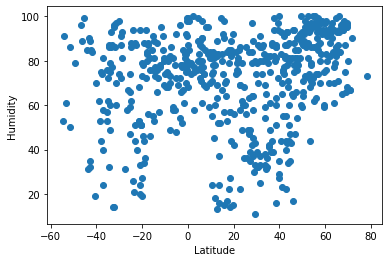

In [13]:
# Build the scatter plots for latitude vs. humidity
hum_x_values = city_data_df["Lat"]
hum_y_values = city_data_df["Humidity"]
plt.scatter(hum_x_values,hum_y_values)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

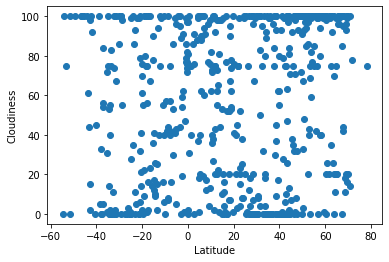

In [14]:
# Build the scatter plots for latitude vs. cloudiness
cloud_x_values = city_data_df["Lat"]
cloud_y_values = city_data_df["Cloudiness"]
plt.scatter(cloud_x_values,cloud_y_values)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

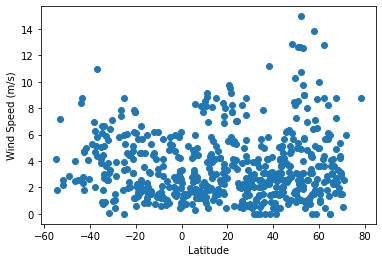

In [15]:
# Build the scatter plots for latitude vs. wind speed
wind_x_values = city_data_df["Lat"]
wind_y_values = city_data_df["Wind Speed"]
plt.scatter(wind_x_values,wind_y_values)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def regression_line(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,50),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,keflavik,64.0049,-22.5624,3.95,70,0,8.23,IS,1699846984
1,kuraymah,18.5500,31.8500,27.30,27,67,2.30,SD,1699847183
2,constantia,44.1833,28.6500,5.38,51,100,1.68,RO,1699846914
3,jamestown,42.0970,-79.2353,2.80,77,0,0.45,US,1699847007
4,puerto real,36.5282,-6.1901,15.70,88,0,3.60,ES,1699847184


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,mount isa,-20.7333,139.5000,37.87,20,6,6.17,AU,1699847185
6,afaahiti,-17.7500,-149.2833,23.93,80,56,2.56,PF,1699847185
7,waitangi,-43.9535,-176.5597,12.95,85,100,8.38,NZ,1699847185
10,luderitz,-26.6481,15.1594,17.39,58,0,7.43,NaN,1699847113
13,adamstown,-25.0660,-130.1015,22.79,86,99,8.81,PN,1699847188


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7932053761658842


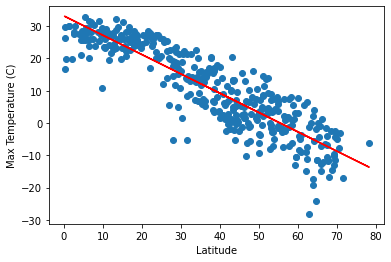

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
regression_line(x_values,y_values)

The r-squared is: 0.4636193521293825


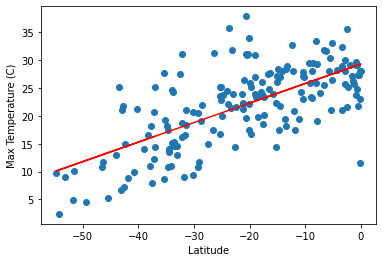

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
regression_line(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06496205431782047


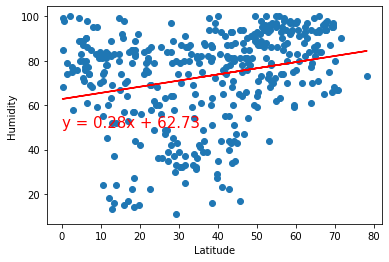

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
regression_line(x_values,y_values)

The r-squared is: 0.02264955475788231


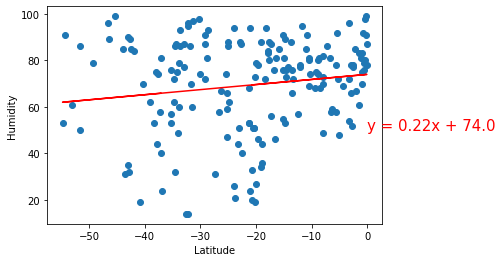

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
regression_line(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.02062280775622303


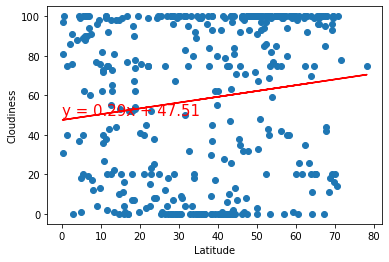

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
regression_line(x_values,y_values)

The r-squared is: 0.00035265721956875785


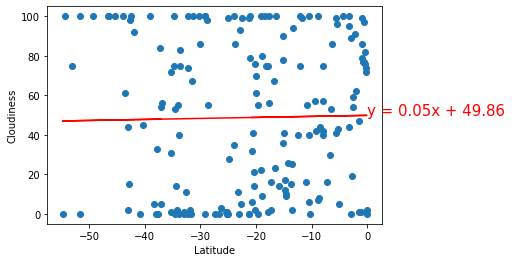

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
regression_line(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.007985458738325372


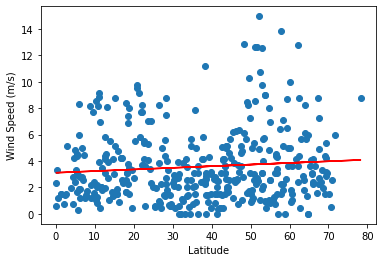

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
regression_line(x_values,y_values)

The r-squared is: 0.057969730477217644


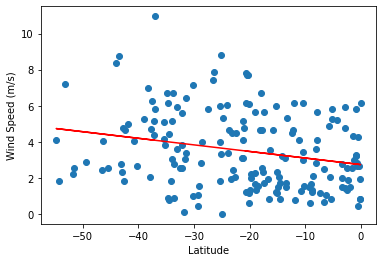

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
regression_line(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE